In [179]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
old_data = pd.read_csv('jobtask/aug_train.csv') 
df = pd.read_csv('jobtask/aug_train.csv')  
df2 = pd.read_csv('jobtask/aug_test.csv') 


In [180]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [181]:
df2.head()
#I notice that this dataset(test) does not have label values, so I decided to do a train_test_split on the training set using
#sklearn. I don't know if this was intentional and the applicants had to notice it, or was it something that I overlooked but
#I will try to do the best I can with the data I have.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [182]:
#I will immediately drop enrollee id and city id because this data won't be diagnostic for generalised predictions
df.drop(['enrollee_id', 'city'], axis=1, inplace = True)

In [183]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [184]:
df.info

<bound method DataFrame.info of        city_development_index gender      relevent_experience  \
0                       0.920   Male  Has relevent experience   
1                       0.776   Male   No relevent experience   
2                       0.624    NaN   No relevent experience   
3                       0.789    NaN   No relevent experience   
4                       0.767   Male  Has relevent experience   
...                       ...    ...                      ...   
19153                   0.878   Male   No relevent experience   
19154                   0.920   Male  Has relevent experience   
19155                   0.920   Male  Has relevent experience   
19156                   0.802   Male  Has relevent experience   
19157                   0.855    NaN   No relevent experience   

      enrolled_university education_level major_discipline experience  \
0           no_enrollment        Graduate             STEM        >20   
1           no_enrollment        Graduate

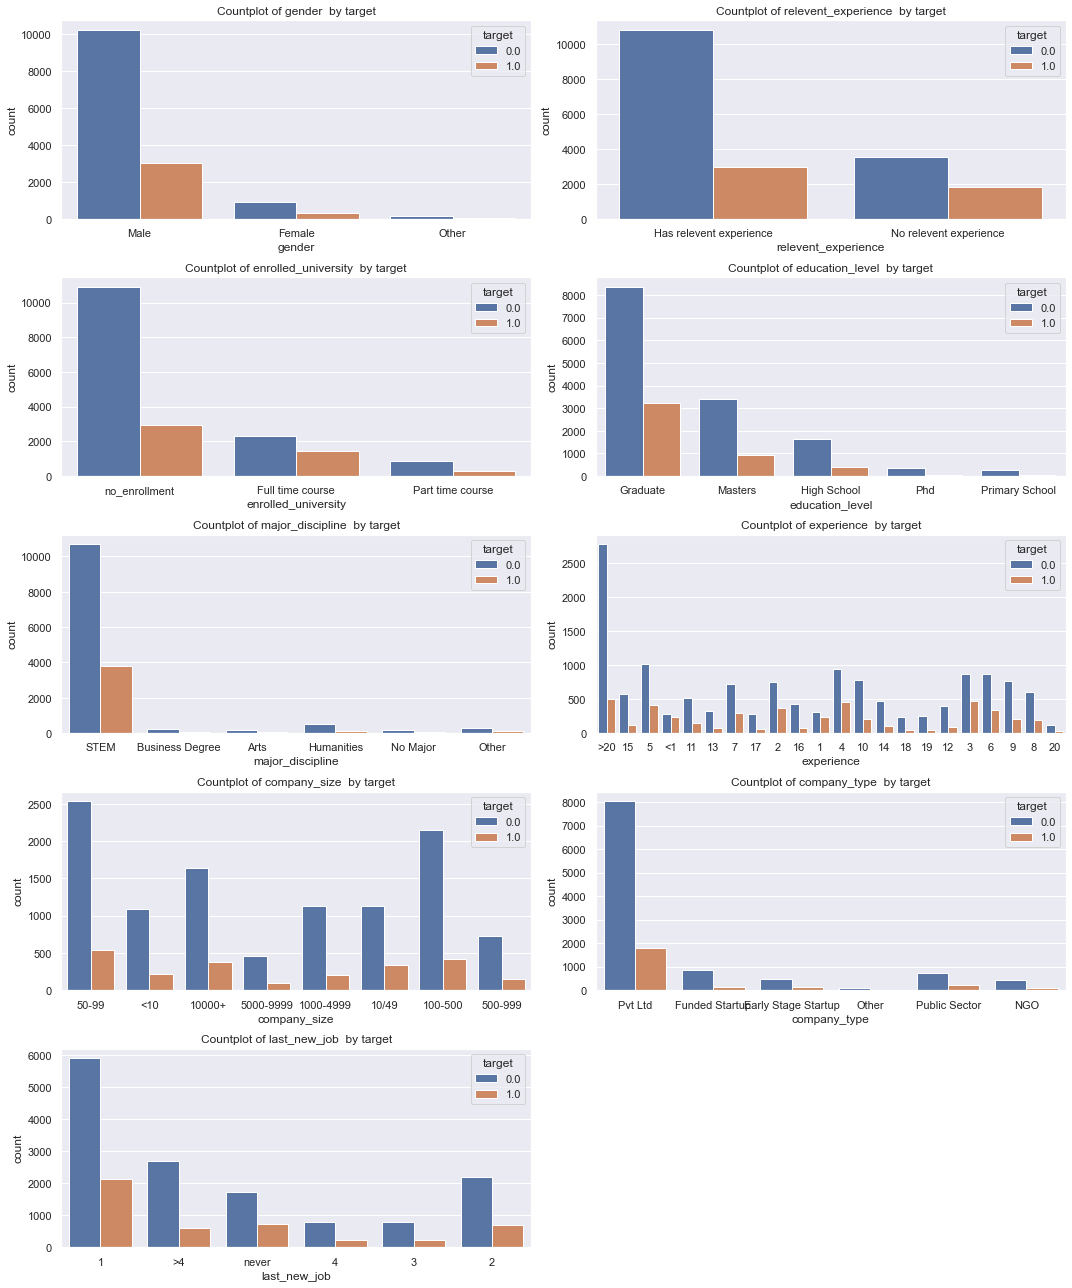

In [185]:
#Here I will create a countplots of the predictors/features with respect to the target variable
#Frequency of each category by label (target)
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', data=old_data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Data Cleaning

In [186]:
# Number of Empty Data Points in each column
for i in list(df.columns):
    print(i + ": "+ str(df[i].isna().sum()))

city_development_index: 0
gender: 4508
relevent_experience: 0
enrolled_university: 386
education_level: 460
major_discipline: 2813
experience: 65
company_size: 5938
company_type: 6140
last_new_job: 423
training_hours: 0
target: 0


In [187]:
#the proportion (%) of column data missing
for i in list(df.columns):
    print(i + ": "+ str((df[i].isna().sum() / df[i].size)  * 100))
    
#Here we can observe that some columns have a very high proportion of missing values:
# Gender (dropped) 23%
# Major Discipline (dropped) 15%
# Company_size 31%
# Company_type 32%

city_development_index: 0.0
gender: 23.530639941538784
relevent_experience: 0.0
enrolled_university: 2.0148240943731075
education_level: 2.401085708320284
major_discipline: 14.68316108153252
experience: 0.33928385008873574
company_size: 30.994884643490973
company_type: 32.04927445453596
last_new_job: 2.207954901346696
training_hours: 0.0
target: 0.0


<AxesSubplot:>

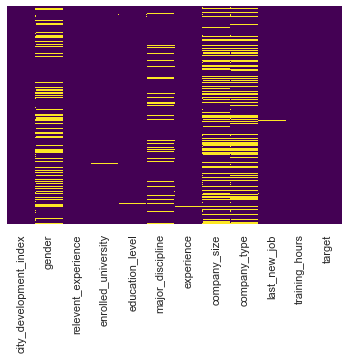

In [188]:

sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = "viridis")
# We create a heatmap of missing values
# It is visible that some features don't have much missing data, but we can also observe that most of these data points are also
# missing data along other features, which means that the efforts to fill these values with mod/average/median won't actually
# save many datapoints. I decided to try to save some of the experience data just for an example, because if we assume that 
# the data is missing due to lazy data collection process ( eg. interviewer not filling the form when the person has no experience)
# we can then add zeroes for all of the missing values.

In [189]:
#To prevent dropping the data from this column (EXPERIENCE) , I will try to take an approach where i will replace missing values with zeroes, since 
#it is pretty safe to assume that where data was not collected, the person did not have any experience.
a = df['experience'].unique()
a

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [190]:
#Since this feature contains data about work experience, we will assume that any missing values are actually equal to 0 years
# of experience
fillwithzeroes = []
for i in df["experience"]:
    
    if i == None:
        fillwithzeroes.append(0)
        
    if i != None:
        fillwithzeroes.append(str(i)) # we convert everything to a string so we can sort it later
       
        
        
df["experience"] = fillwithzeroes

In [191]:
sorted(df['experience'].unique())
#results are not useful in this ordering but they will be reordered with copy+paste

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '<1',
 '>20',
 'nan']

In [192]:
sorted_experience = ["nan", '<1','1', '2','3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',

 '20',
 

 ">20"]

In [193]:
#I will also convert categories in ordinal scale variable (int)
ordinalna = []
for i in df["experience"]:
    for j in range(len(sorted_experience)):
        if i == sorted_experience[j]:
            ordinalna.append(j)
        if i == None:
            ordinalna.append(0)
       
        
        
df["experience"] = ordinalna
        

In [194]:
df.dropna(inplace = True)

In [195]:
df.shape
#I ended up saving only 5 data points in comparison to just dropping Na

(8960, 12)

Handling Categorical Data and Feature Engineering

In [196]:
#Converting from string to an ordinal scale variable
ordinalna_edukacija = []
for i in df["education_level"]:
    if(i == "High School" or i == "Graduate" or i == "Masters" or i == "Phd" or i == "Primary School"):
        if i == "High School":
            ordinalna_edukacija.append(1)
    
        if i == "Graduate":
            ordinalna_edukacija.append(2)
        
        if i == "Masters":
            ordinalna_edukacija.append(3)
        
        if i == "Phd":
            ordinalna_edukacija.append(4)
        
        if i == "Primary School":
            ordinalna_edukacija.append(0)
    else:
        ordinalna_edukacija.append(-1)
        
        
df["education_level"] = ordinalna_edukacija

In [197]:
#Converting from string to a dummy categorical variable
ordinalna = []
for i in df["relevent_experience"]:
    
    if i == "Has relevent experience":
        ordinalna.append(1)
        
    if i == "No relevent experience":
        ordinalna.append(0)
       
        
        
df["relevent_experience"] = ordinalna

In [198]:
#Here will create dummy variables for purely categorical data using pandas.get_dummies. We set drop_first to true in order to
#avoid multicollinearity, because if we didn't drop the first column, we would get high/perfect correlations between the levels
#of the categorical variables.

gender = pd.get_dummies(df["gender"], drop_first = True)
gender["Other_gender"] = gender["Other"]
gender.drop("Other",axis = 1 ,inplace=True)

company_type = pd.get_dummies(df["company_type"], drop_first = True)
company_type.drop("Other",axis = 1 ,inplace=True)

degree_type = pd.get_dummies(df["major_discipline"], drop_first = True)
degree_type["Other_degree"] = degree_type["Other"]
degree_type.drop("Other",axis = 1 ,inplace=True)

df = pd.concat([df,gender,company_type, degree_type], axis = 1)

X = df.drop("major_discipline", axis=1, inplace = True)
X = df.drop("company_type", axis=1 , inplace = True)
X = df.drop("gender", axis=1, inplace = True)


In [199]:
a = df['enrolled_university'].unique()
a

array(['no_enrollment', 'Part time course', 'Full time course'],
      dtype=object)

In [200]:
#Converting from string to an ordinal variable
ordinalna = []
for i in df["enrolled_university"]:
    
    
    if i == "no_enrollment":
        ordinalna.append(0)
        
    if i == "Part time course":
        ordinalna.append(1)
    if i == "Full time course":
        ordinalna.append(2)
    
    
       

        
df["enrolled_university"] = ordinalna

In [201]:
#At this point I noticed that if used lambda functions it could probably improve readability, so I wil continue with
#that approach from now on...

In [202]:
a = df['company_size'].unique()
a

array(['50-99', '<10', '5000-9999', '1000-4999', '10/49', '100-500',
       '10000+', '500-999'], dtype=object)

In [203]:
def company_size_ordinal(x):
    
    if x == "<10":
        return 0
    elif x == "50-99" or x == "10/49":
        return 1
    elif x == "100-500":
        return 2
    elif x == "500-999":
        return 3
    elif x == "1000-4999" or x == "5000-9999":
        return 4
    elif x == "10000+":
        return 5

In [204]:
df["company_size"] = df["company_size"].apply(lambda x: company_size_ordinal(x))

In [205]:
a = df['last_new_job'].unique()
a

array(['>4', '4', '1', '3', '2', 'never'], dtype=object)

In [206]:
def last_newjob_ordinal(x):
    
    if x == "never":
        return 0
    elif x == "1" or x == "2":
        return 1
    elif x == "3" or x == "4" or x ==">4":
        return 2
    
#ordinal scale 0-2
#0 - no wait #1 - some waiting time #2 a lot of waiting time

In [207]:
df["last_new_job"] = df["last_new_job"].apply(lambda x: last_newjob_ordinal(x))

In [208]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Male,Other_gender,Funded Startup,NGO,Public Sector,Pvt Ltd,Business Degree,Humanities,No Major,STEM,Other_degree
1,0.776,0,0,2,16,1,2,47,0.0,1,0,0,0,0,1,0,0,0,1,0
4,0.767,1,0,3,22,1,2,8,0.0,1,0,1,0,0,0,0,0,0,1,0
7,0.762,1,0,2,14,0,2,18,1.0,1,0,0,0,0,1,0,0,0,1,0
8,0.920,1,0,2,8,1,1,46,1.0,1,0,0,0,0,1,0,0,0,1,0
11,0.920,1,0,2,6,4,1,108,0.0,1,0,0,0,0,1,0,0,0,1,0


In [209]:
#As we now have two features called "Other" (Gender) and "Other" (Major_discipline) we will drop one of them and rename it

# Exploratory Data Analysis

In [210]:
old_data = pd.read_csv('jobtask/aug_train.csv')  
old_data.dropna(inplace = True)

In [211]:
df.describe()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Male,Other_gender,Funded Startup,NGO,Public Sector,Pvt Ltd,Business Degree,Humanities,No Major,STEM,Other_degree
count,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000
mean,0.844544,0.876786,0.245201,2.330357,12.628571,2.332254,1.312723,65.076004,0.165513,0.901451,0.008817,0.087500,0.039732,0.062946,0.758817,0.018973,0.042188,0.012500,0.892188,0.019754
std,0.116199,0.328701,0.609327,0.527420,6.550770,1.645360,0.546095,60.226763,0.371664,0.298072,0.093489,0.282582,0.195340,0.242880,0.427825,0.136438,0.201028,0.111109,0.310161,0.139163
min,0.448000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.794000,1.000000,0.000000,2.000000,7.000000,1.000000,1.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.910000,1.000000,0.000000,2.000000,11.000000,2.000000,1.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.920000,1.000000,0.000000,3.000000,19.000000,4.000000,2.000000,88.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.949000,1.000000,2.000000,4.000000,22.000000,5.000000,2.000000,336.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
df.corr()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Male,Other_gender,Funded Startup,NGO,Public Sector,Pvt Ltd,Business Degree,Humanities,No Major,STEM,Other_degree
city_development_index,1.000000,-0.005123,-0.137807,0.071391,0.333234,0.071574,0.168172,-0.004838,-0.421780,-0.033591,0.034708,0.023551,0.020094,0.059040,-0.030147,0.040831,0.100873,0.018623,-0.124177,0.019677
relevent_experience,-0.005123,1.000000,-0.188533,-0.055555,0.127311,-0.056589,0.029379,0.017585,-0.036796,0.068585,-0.055451,0.043982,-0.095847,-0.185262,0.117261,-0.049911,-0.063219,-0.028118,0.088655,-0.024868
enrolled_university,-0.137807,-0.188533,1.000000,-0.068699,-0.252457,-0.028609,-0.120107,0.012388,0.089885,0.003388,0.014949,-0.036456,0.033487,0.093302,-0.062566,-0.013002,-0.052566,-0.015601,0.057209,-0.000527
education_level,0.071391,-0.055555,-0.068699,1.000000,0.170399,0.063737,0.050124,-0.010067,-0.036967,-0.032869,-0.018332,-0.019472,0.042679,0.130422,-0.074249,-0.018863,0.026450,-0.045714,0.022602,-0.000720
experience,0.333234,0.127311,-0.252457,0.170399,1.000000,0.092455,0.353477,-0.002450,-0.197877,0.082547,-0.003583,-0.013434,-0.004254,0.004524,0.048205,0.000767,-0.028615,0.012821,0.029182,-0.015826
company_size,0.071574,-0.056589,-0.028609,0.063737,0.092455,1.000000,0.083979,-0.023251,0.002056,-0.008562,0.008528,-0.209937,0.018308,0.109660,0.173156,0.014179,-0.015048,-0.019057,0.028643,-0.009656
last_new_job,0.168172,0.029379,-0.120107,0.050124,0.353477,0.083979,1.000000,-0.011101,-0.073566,0.026150,0.002831,-0.085478,0.014304,0.023247,0.077776,0.001254,0.021139,0.012831,-0.014438,-0.015205
training_hours,-0.004838,0.017585,0.012388,-0.010067,-0.002450,-0.023251,-0.011101,1.000000,-0.012679,-0.005583,-0.012905,0.010811,-0.006613,-0.025577,0.001799,0.012484,0.003653,-0.010067,0.006109,-0.007890
target,-0.421780,-0.036796,0.089885,-0.036967,-0.197877,0.002056,-0.073566,-0.012679,1.000000,0.003172,-0.003455,-0.023129,-0.006031,0.000804,0.005387,-0.015710,-0.033709,-0.009562,0.054114,-0.022219
Male,-0.033591,0.068585,0.003388,-0.032869,0.082547,-0.008562,0.026150,-0.005583,0.003172,1.000000,-0.285251,-0.026156,-0.028595,-0.037648,0.056050,-0.003422,-0.090808,0.013608,0.079445,-0.014953


Since the data is now converted into numerical datatypes, we can try to asses the correlations within the dataset, which we will do by displaying a heatmap of the correlation matrix.

<AxesSubplot:>

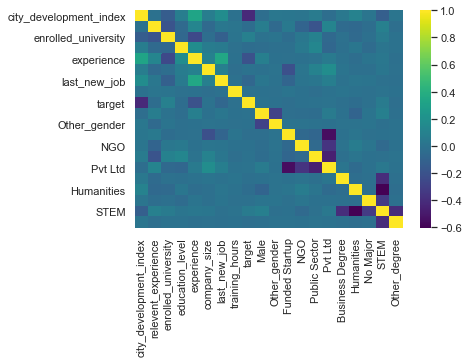

In [213]:
sns.heatmap(df.corr(), annot = False, cmap = "viridis")

We can see some inter-correlations between features, notice that purple(dark blue) areas represent negative correlations, and if you look into these areas (reverse L-shaped) you can see that the negative correlations are present between the multiple levels of the categorical variables that we have encoded as dummy variables.  We can also observe moderate negative correlations of the target with city development index and experience (However there is also a moderate positive correlation between the predictors). And we can see some positive correlations of the ordinal variable enrolled_university with the target. Along with STEM(major_discipline) and Pvt Ltd(company_type) dummy variables. We tried to reduce multicolinearity by dropping the first columns while creating dummies, which is all we can do in this situation... if we have mutually exclusive categories there is no way to simply erase the correlation between dummy variables.

C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

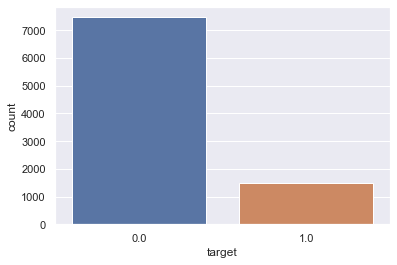

In [214]:
sns.countplot(df["target"])

In [215]:
df.loc[df["target"] == 1].size / (df.loc[df["target"] == 0].size + df.loc[df["target"] == 1].size)
# % of people wanting to switch jobs

0.16551339285714287

In [216]:
# % of people NOT wanting to switch jobs
df.loc[df["target"] == 0].size / (df.loc[df["target"] == 0].size + df.loc[df["target"] == 1].size)

# We see the data is quite unbalanced so we probably don't want to use accuracy score as our only (or main) evauluation metric
# Even a simple and meaningless function like def zero_spammer: return 0 would reach a 83.44% accuracy score on this dataset.


# Given the possible purpose of such classification (for example to email all the people who may want to change job, but to reduce)
# the number of people who don't want a job change and end up getting the email... in this scenario we care more about the recall
# for the 1 - wants a job change, but we also care about F1 score of 0. Further down in the notebook we will try to define our
# custom evaluation metric as a little creative addition to the solution. This metric may note be optimal as it will not be weighted
# to value recall for 1 more heavily than the F1 score for 0.

0.8344866071428572

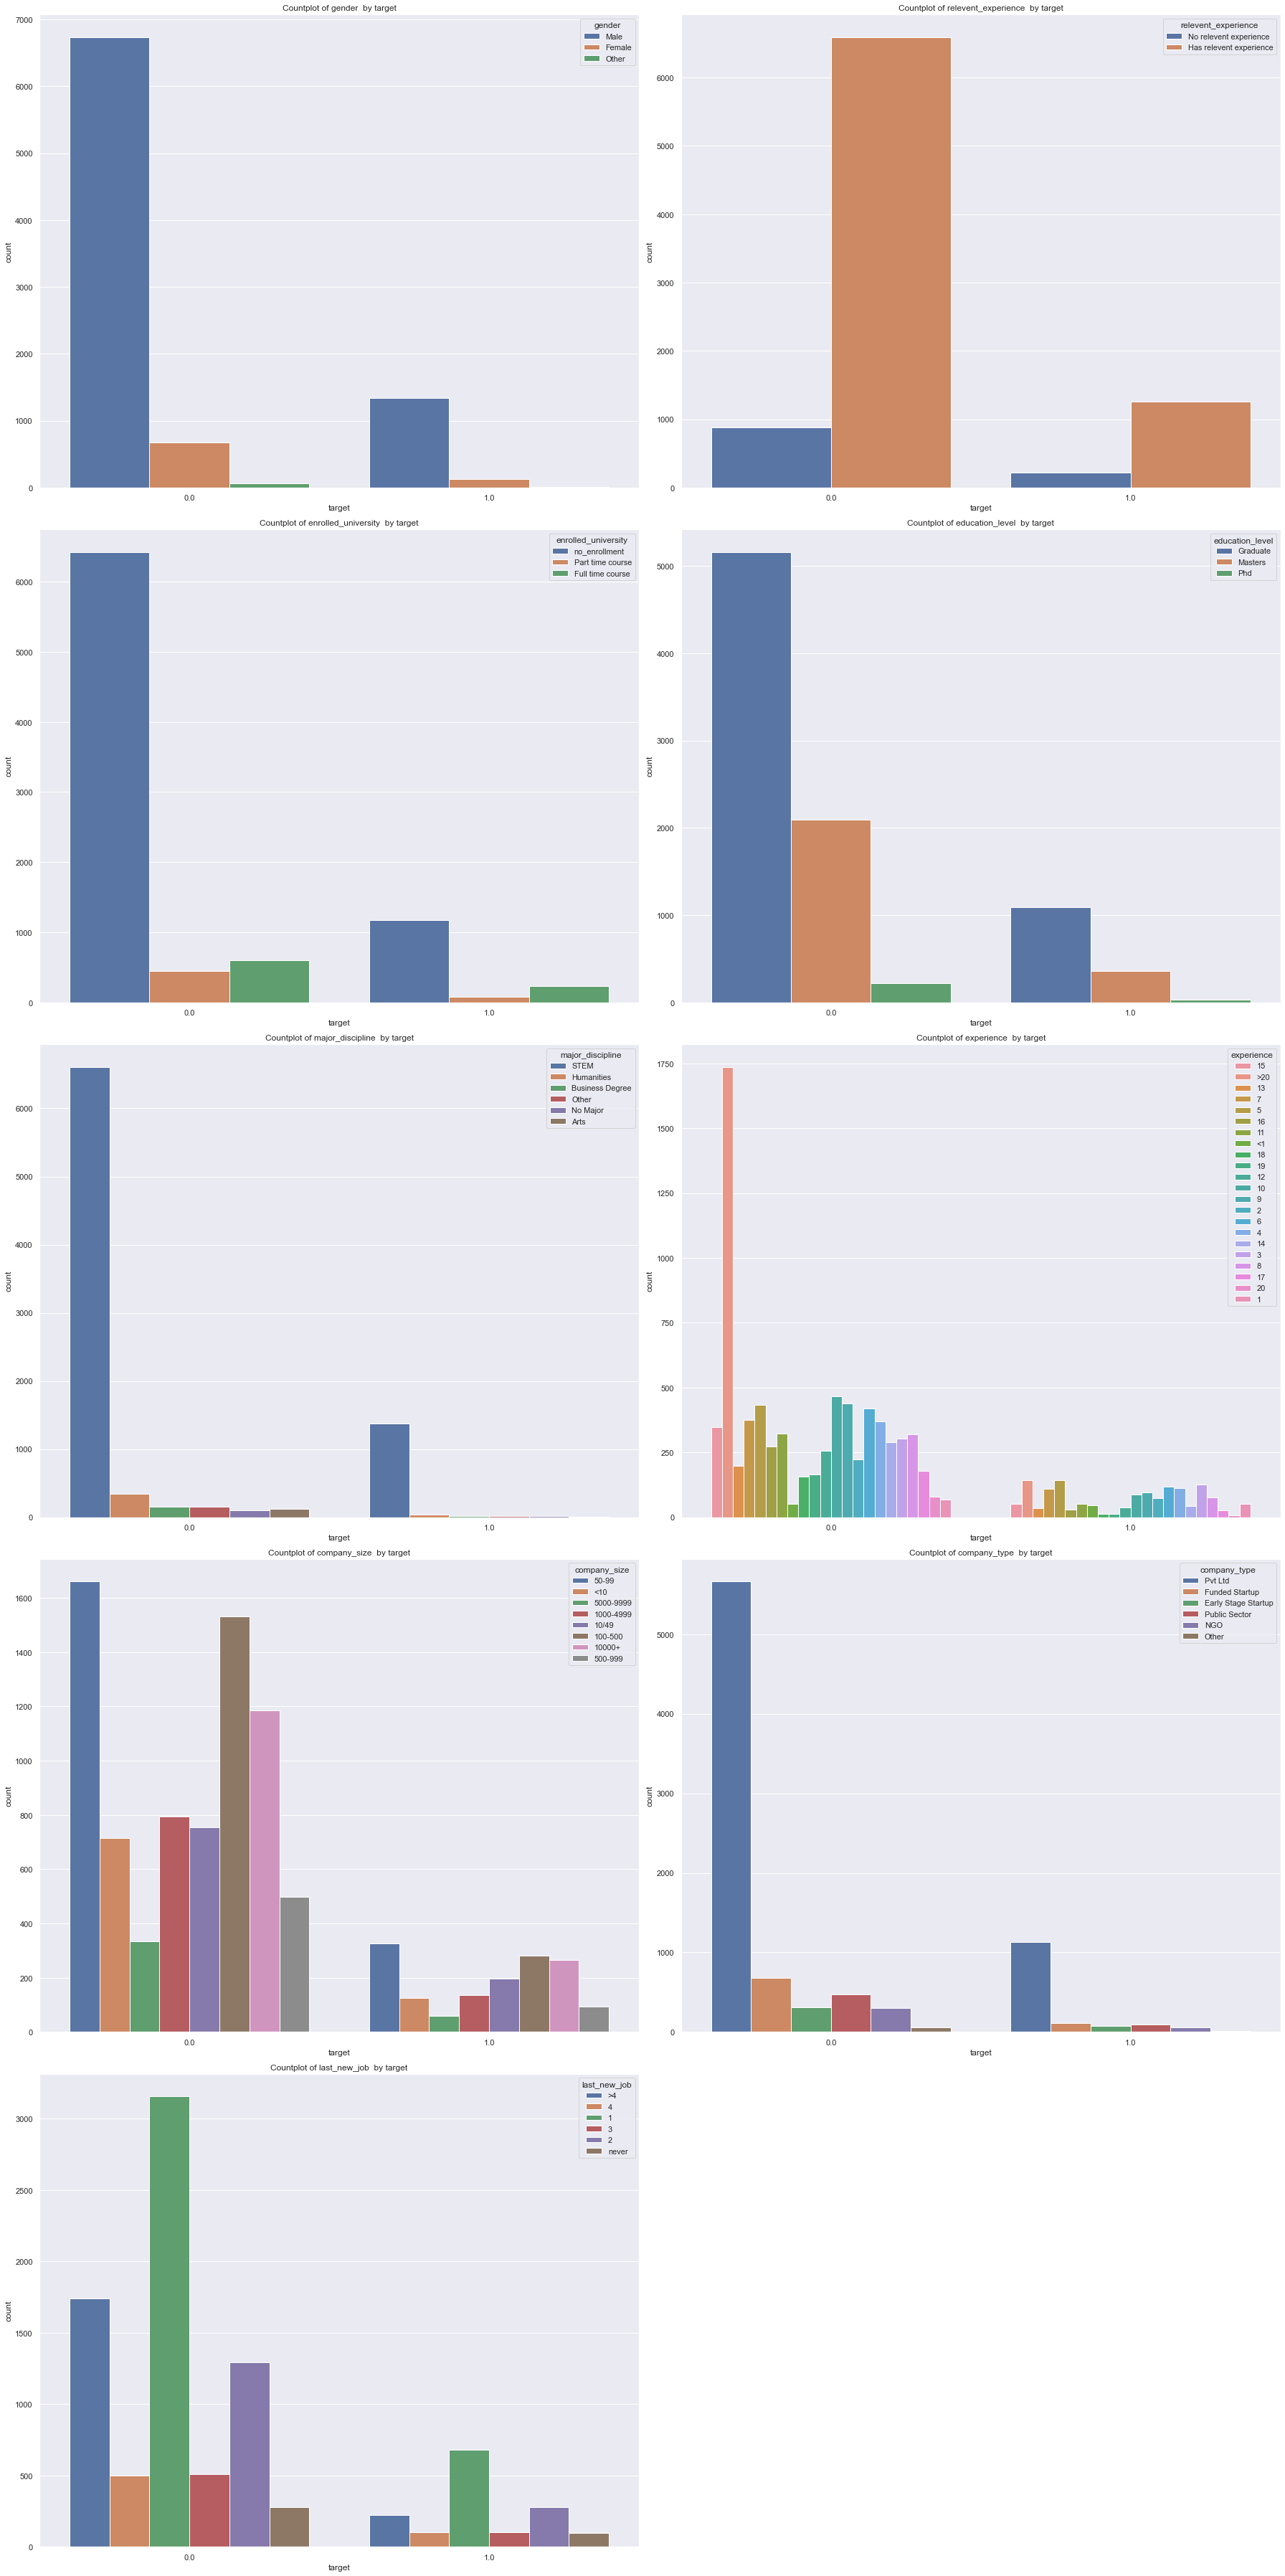

In [217]:
#Here I will create a countplots of the predictors/features with respect to the target variable
#Frequency of each category by label (target)
plt.figure(figsize=[25,50])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x="target", hue=f, data=old_data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

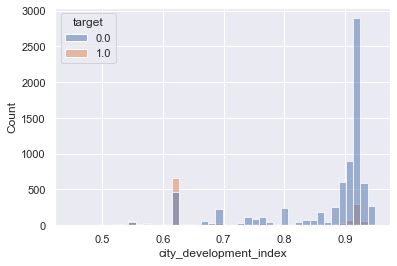

In [218]:
sns.histplot(data=df, x="city_development_index", hue="target")
#We see that there are a lot of ones in the low side of city development index distribution, which does not exactly follow 
#the proportion of the data (like in most of the countplots), from this we can see that city_development_index is probably
#a good predictor for our label.

<AxesSubplot:xlabel='experience', ylabel='Count'>

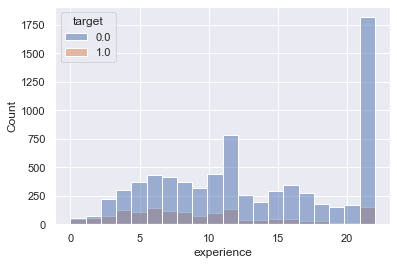

In [219]:
sns.histplot(data=df, x="experience", hue="target")
#to contrast this, we can see in this histogram that the values of 1 on label are pretty much following the distribution, except
#at the lowest point where it seems that the frequency of ones approaches the frequency of zeroes which are more prevalent in 
#the data

<AxesSubplot:xlabel='company_size', ylabel='Count'>

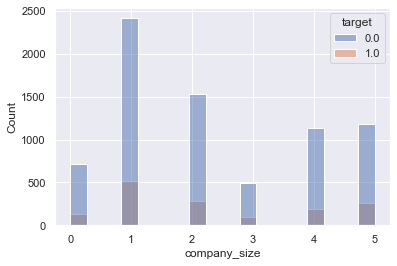

In [220]:
sns.histplot(data=df, x="company_size", hue="target")
#to contrast this, we can see in this histogram that the values of 1 on label are pretty much following the frequency distribution

# Modelling 

Since we have a very unbalanced dataset, the accuracy score is pretty useless due to the fact that even a simple function that returns 0 no matter what will have an accuracy score of 0.83 on this data. I will try to make a model that is a best fit for this data and the posible usecase of the model in the following steps:
1) I will try to run base models on the original data (as if the data was not unbalanced).

2) I will try to use oversampling to train the model in the hope that the model will be useful on the actual (not oversampled) test data.

3) Finally, I will try to to use cost-sensitive learning in a deep learning model to try and find a best weight ratio between the levels of the target variable.

Since the accuracy metric won't be useful without first checking the other metrics, for the general purpose model we would look at the weighted average F1-score, but I will assume that the purpose of the model values recall for 1 more heavily than the other metrics. However, I will still include the best general purpose model based on the f1 score. F1 score is a harmonic mean of recall (proportion of relevant cases found) and precision (proportion of correctly classified instances). 

Precision = True Positive / (True Positive + False Positive)

Recall = True Positive / (True Positive + False Negative) 

F1 = 2 * ((Precision * Recall) / Precision + Recall)


Given these definitions, we can see that the greatest challenge in this problem would be to increase the recall and precision levels on the 1- Wants a job change category of the label, since there is around 5x more instances where the label is equal 0 - Doesn't want a job change. However, when evaluating metrics we should be careful not to forget about the scores for the 0 label in the cost-sensitive learning part as we will be manually modifying the importance of each class of the label. I've also noticed that a lot of results on kaggle using SMOTE, test scores are obtained on the oversampled test data, which we cannot treat as the original test data (without oversampling). By using oversampling we will indeed increase our metrics to very satisfying levels on the oversampled TEST data, but we will see that when we apply the model back on the unmodified TEST data, in my case model turned out to be even worse than if we trained the model on the original unbalanced data.

Even though it would be best to optimize the F1 score, given the nature of our problem it would probably make sense to sacrfice some of the precision on the 1 - Wants a job change for the better recall. For example, if the main goal of the model is to identify people to email about the job position opening, we are not concerned too much about making the most precise predictions, because there is no much harm done if we email someone who may not want the job change. Instead we want to optimize recall because on the other hand, we want to maximize the number of emails that actually reach people who want a job change (even if it means that we will email some of the people who are not interested).

Since we really want to be able to detect people who want a job change as much as possible, no matter if we add some of the others in the mix, then our most valuable metric would be recall for 1:

#Recall = NumberOfTruePositives/TotalNumberOfPositivesInTheData

This is the number we ultimately care about the most (to detect all of the people that want a job change), but this metric in itself is not enough because it would reach maximum value with if we just blindly predict 1. In that case there is nothing actually useful about the model, we could just email all of the people in our mailing list right? 

Here we will define our custom metric formula to maximize the recall of 1 - Wants job change without greatly reducing the precision and recall of 0 - Doesn't want a job change , so our formula would look something like this:

# recall_1 and F1_0 balance = (Recall for 1 * F1 for 0) / (((Recall for 1 + F1 for 0))/2)

*Keep in mind that I by no means think that I've found the best possible metric, I just wanted to add some creative touch to the problem and showcase the reasoning behind it.

We will still try to pick the model with better recall for 1 even if the balance score is better on the other model, since the function is not weighted more heavily for the recall of 1 which in our case is more important than the F1 Score of 0.

In code, I will define this metric as custom_metric


*NOTE: If I did not assume that the recall for 1 is more important than the other metrics and if we were looking for the best general purpose model, we would want to look at the weighted average F1 score.



In [221]:
def custom_metric(recallfor1,f1for0):
    return (recallfor1  * f1for0)/((recallfor1 + f1for0)/2)

In [222]:
#In this part we will run a little simulation to see how our metric behaves

In [223]:
recalls = np.array([0.99,0.88,0.77,0.66,0.55,0.44,0.22,0.88])
fones = np.array([0,0.14,0.23,0.34,0.55,0.77,0.88,0.99])

In [224]:
custom_metric_list = []
for i in range(8):
    custom_metric_list.append(custom_metric(recalls[i], fones[i]))
custom_metric_list = np.array(custom_metric_list)

In [225]:
print(recalls.shape)
print(fones.shape)
print(custom_metric_list.shape)

(8,)
(8,)
(8,)


In [228]:
%matplotlib qt

In [229]:
#simulation of the custom_metric behavior

#If you run next cell too quickly, the window will not appear , as the cell will set matplotlib to inline again
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = recalls
y = fones
z = custom_metric_list

ax.set_xlabel("Recall_1")
ax.set_ylabel("F1_score_0")
ax.set_zlabel("custom_metric")
ax.invert_yaxis()
ax.scatter(x, y, z)






In [230]:
%matplotlib inline

In [231]:
X = df.drop('target', axis=1)
y = df['target']

In [232]:
X.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Male,Other_gender,Funded Startup,NGO,Public Sector,Pvt Ltd,Business Degree,Humanities,No Major,STEM,Other_degree
1,0.776,0,0,2,16,1,2,47,1,0,0,0,0,1,0,0,0,1,0
4,0.767,1,0,3,22,1,2,8,1,0,1,0,0,0,0,0,0,1,0
7,0.762,1,0,2,14,0,2,18,1,0,0,0,0,1,0,0,0,1,0
8,0.920,1,0,2,8,1,1,46,1,0,0,0,0,1,0,0,0,1,0
11,0.920,1,0,2,6,4,1,108,1,0,0,0,0,1,0,0,0,1,0


In [233]:
from sklearn.linear_model import LogisticRegression

Logistic Regression Model

In [234]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)


In [235]:
from sklearn.model_selection import train_test_split

In [236]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=42)

In [237]:
saved_xtrain = X_train

In [238]:
saved_ytrain = y_train

In [239]:
saved_ytest = y_test

In [240]:
saved_xtest = X_test

In [241]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [242]:
from sklearn.metrics import classification_report

In [243]:
predictions = log_model.predict(X_test)

In [244]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1130
         1.0       0.58      0.21      0.30       214

    accuracy                           0.85      1344
   macro avg       0.72      0.59      0.61      1344
weighted avg       0.82      0.85      0.82      1344



In [245]:
import sklearn

In [246]:
X.shape

(8960, 19)

In [247]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


Deep Learning Model


model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],)))
model.add(Dense(64, input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [248]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape=(X.shape[1],)))
model.add(Dense(256, activation = "sigmoid"))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [249]:
model.fit(X_train,y_train, epochs=10,validation_split=0.1)

Train on 6854 samples, validate on 762 samples
Epoch 1/10
6854/6854 [==============================] - 1s 148us/sample - loss: 0.4482 - accuracy: 0.8290 - val_loss: 0.4422 - val_accuracy: 0.8333
Epoch 2/10
6854/6854 [==============================] - 1s 85us/sample - loss: 0.4370 - accuracy: 0.8324 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 3/10
6854/6854 [==============================] - 1s 82us/sample - loss: 0.4350 - accuracy: 0.8329 - val_loss: 0.4245 - val_accuracy: 0.8320
Epoch 4/10
6854/6854 [==============================] - 1s 79us/sample - loss: 0.4332 - accuracy: 0.8350 - val_loss: 0.4399 - val_accuracy: 0.8320
Epoch 5/10
6854/6854 [==============================] - 1s 85us/sample - loss: 0.4330 - accuracy: 0.8334 - val_loss: 0.4412 - val_accuracy: 0.8320
Epoch 6/10
6854/6854 [==============================] - 1s 82us/sample - loss: 0.4294 - accuracy: 0.8343 - val_loss: 0.4203 - val_accuracy: 0.8346
Epoch 7/10
6854/6854 [==============================] - 1s 83us/sample

In [250]:
y_test_pred = model.predict(X_test)

In [251]:
y_test_pred

array([[0.1588658 ],
       [0.24994947],
       [0.07140979],
       ...,
       [0.18459131],
       [0.07885236],
       [0.10893804]], dtype=float32)

In [252]:
for i in range(len(y_test_pred)):
    
    if y_test_pred[i] >= 0.5:
        y_test_pred[i] = 1
    if y_test_pred[i] <= 0.5:
        y_test_pred[i] = 0

In [253]:
y_test_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [254]:
confusion = sklearn.metrics.confusion_matrix(y_true=y_test.astype("int32"), y_pred=y_test_pred.astype("int32"))

In [255]:
confusion

array([[1125,    5],
       [ 207,    7]], dtype=int64)

In [256]:
print(classification_report(y_test.astype("int32"),y_test_pred.astype("int32")))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1130
           1       0.58      0.03      0.06       214

    accuracy                           0.84      1344
   macro avg       0.71      0.51      0.49      1344
weighted avg       0.80      0.84      0.78      1344



# We can observe that due to the imbalance we have some trouble hitting desirable recall levels on the "1" - wants to change job category of the label. Hence, we will try to use SMOTE to artificially balance our dataset with oversampling.

In [257]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',k_neighbors = 3)
X_sm , y_sm = smote.fit_resample(X,y)

In [258]:
from sklearn.metrics import accuracy_score

In [259]:
y_sm.value_counts()

1.0    7477
0.0    7477
Name: target, dtype: int64

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.15)

In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [264]:
model_lr = LogisticRegression()
model_lr.fit(scaled_X_train, y_train)

LogisticRegression()

In [265]:
pred_lr = model_lr.predict(scaled_X_test)

In [266]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      1114
         1.0       0.81      0.75      0.78      1130

    accuracy                           0.79      2244
   macro avg       0.79      0.79      0.79      2244
weighted avg       0.79      0.79      0.79      2244



In [267]:
sklearn.metrics.confusion_matrix(y_true=y_test.astype("int32"), y_pred=pred_lr.astype("int32"))

array([[917, 197],
       [279, 851]], dtype=int64)

In [268]:
accuracy_score(y_test,pred_lr)

0.7878787878787878

In [277]:
pred_lr = model_lr.predict(saved_xtest)
#Predicting on the original test set

C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [278]:
pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [279]:
print(classification_report(saved_ytest.astype("int32"),pred_lr.astype("int32")))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1130
           1       0.00      0.00      0.00       214

    accuracy                           0.84      1344
   macro avg       0.42      0.50      0.46      1344
weighted avg       0.71      0.84      0.77      1344



C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# After oversampling, we get very nice accuracy with logistic regression model while having reasonable recall and precision on both categories. However, if we try to apply the model to the original test data ( without oversampling ) the results are underwhelming. 

# In this part we will try a deep learning model with 2 hidden layers , and since the data is not that enormous, we will simply train all the models with different number of neurons in densely connected layers and compare their accuracy score on the test set afterwards. Then we will pick the best model and further explore the metrics to see if the high accuracy was meaningful. 

In [280]:
model_neurons = [[512,256],[256,128],[128,64],[64,32],[32,16],[16,8],[8,4]]

In [281]:
for i in model_neurons:
    model = Sequential()
    model.add(Dense(i[0], activation = "relu",input_shape=(X.shape[1],)))
    model.add(Dense(i[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(scaled_X_train,y_train, epochs=10,validation_split=0.1, verbose = 0)
    y_test_pred = model.predict(scaled_X_test)
    for j in range(len(y_test_pred)):
    
        if y_test_pred[j] >= 0.5:
            y_test_pred[j] = 1
        if y_test_pred[j] <= 0.5:
            y_test_pred[j] = 0
            
            #add custom metric
    print("Layer1: " + str(i[0]) + " Layer2: " + str(i[1]) + "  accuracy:"+ str(accuracy_score(y_test,y_test_pred)))    

Layer1: 512 Layer2: 256  accuracy:0.801693404634581
Layer1: 256 Layer2: 128  accuracy:0.7941176470588235
Layer1: 128 Layer2: 64  accuracy:0.7990196078431373
Layer1: 64 Layer2: 32  accuracy:0.7976827094474154
Layer1: 32 Layer2: 16  accuracy:0.7909982174688057
Layer1: 16 Layer2: 8  accuracy:0.7936720142602496
Layer1: 8 Layer2: 4  accuracy:0.7843137254901961


In [282]:
model = Sequential()
model.add(Dense(256, activation = "relu",input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [285]:
model.fit(scaled_X_train,y_train, epochs=15,validation_split=0.15)

Train on 10803 samples, validate on 1907 samples
Epoch 1/15
10803/10803 [==============================] - 1s 83us/sample - loss: 0.2658 - accuracy: 0.8873 - val_loss: 0.5145 - val_accuracy: 0.8096
Epoch 2/15
10803/10803 [==============================] - 1s 85us/sample - loss: 0.2650 - accuracy: 0.8878 - val_loss: 0.4964 - val_accuracy: 0.8091
Epoch 3/15
10803/10803 [==============================] - 1s 83us/sample - loss: 0.2598 - accuracy: 0.8914 - val_loss: 0.4927 - val_accuracy: 0.8180
Epoch 4/15
10803/10803 [==============================] - 1s 83us/sample - loss: 0.2627 - accuracy: 0.8886 - val_loss: 0.5225 - val_accuracy: 0.8191
Epoch 5/15
10803/10803 [==============================] - 1s 83us/sample - loss: 0.2589 - accuracy: 0.8904 - val_loss: 0.5291 - val_accuracy: 0.8096
Epoch 6/15
10803/10803 [==============================] - 1s 83us/sample - loss: 0.2574 - accuracy: 0.8914 - val_loss: 0.5119 - val_accuracy: 0.8306
Epoch 7/15
10803/10803 [==============================] -

In [286]:
y_test_pred = model.predict(scaled_X_test)

In [287]:
y_test_pred_noSmote = model.predict(saved_xtest)

In [288]:
for i in range(len(y_test_pred)):
    
    if y_test_pred[i] >= 0.5:
        y_test_pred[i] = 1
    if y_test_pred[i] <= 0.5:
        y_test_pred[i] = 0

In [289]:
for i in range(len(y_test_pred_noSmote)):
    
    if y_test_pred_noSmote[i] >= 0.5:
        y_test_pred_noSmote[i] = 1
    if y_test_pred_noSmote[i] <= 0.5:
        y_test_pred_noSmote[i] = 0

In [290]:
print(classification_report(y_test.astype("int32"),y_test_pred.astype("int32")))
#Classification report for the oversampled test data

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1114
           1       0.81      0.84      0.82      1130

    accuracy                           0.82      2244
   macro avg       0.82      0.82      0.82      2244
weighted avg       0.82      0.82      0.82      2244



In [291]:
print(classification_report(saved_ytest.astype("int32"),y_test_pred_noSmote.astype("int32")))
#Classification report for the original test data

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1130
           1       0.00      0.00      0.00       214

    accuracy                           0.84      1344
   macro avg       0.42      0.50      0.46      1344
weighted avg       0.71      0.84      0.77      1344



C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Undersampling code

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#under = RandomUnderSampler(sampling_strategy="auto")

In [ ]:
#X_train, y_train = under.fit_resample(X_train, y_train)

# Cost - sensitive Deep Neural Network

In [356]:
weights = {}

In [357]:

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [109]:
%matplotlib inline

In [110]:
saved_ytrain

524      0.0
13732    0.0
19037    0.0
12800    0.0
12833    0.0
        ... 
12199    0.0
11014    0.0
11426    0.0
1813     0.0
15573    0.0
Name: target, Length: 7616, dtype: float64

C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target'>

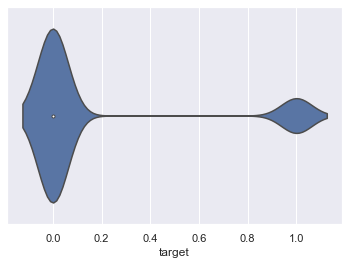

In [112]:
sns.violinplot(saved_ytrain, xlabel = "target")
#Checking if the saved_X/Y_train/test variables are not affected by oversampling by accident


C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target'>

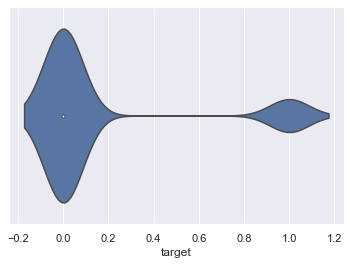

In [113]:
sns.violinplot(saved_ytest, xlabel = "target")

Here we will attempt to do the classification with cost-sensitive deep neural network, where we will try to see which model in our grid search for weights and number of neurons in hidden layers will result in greatest recall for 1 and greatest values in our custom metric (that should represent the balance of recall(1) and F1(0).

In [361]:
# Returns (recall_1 * F1_0 ) / ((recall_1 + F1_0 )/2)
def custom_metric(confusion):
    return ((confusion[1][1] / (confusion[1][1] + confusion[1][0]) ) * (2* confusion[0][0] / (confusion[0][0] + confusion[1][0]) * confusion[0][0] / (confusion[0][1] + confusion[0][0])) /( (confusion[0][0] / (confusion[0][1] + (confusion[0][0])) + confusion[0][0] / (confusion[0][0] + confusion[1][0] ))))/ (((confusion[1][1] / (confusion[1][1] + confusion[1][0]) ) + ( confusion[0][0] / (confusion[0][0] + confusion[1][0]) * confusion[0][0] / (confusion[0][1] + confusion[0][0])) /( (confusion[0][0] / (confusion[0][1] + (confusion[0][0])) + confusion[0][0] / (confusion[0][0] + confusion[1][0] ))))/2)
    

In [362]:
model_neurons = [[512,256],[256,128],[128,64],[64,32],[32,16],[16,8],[8,4]]

In [363]:

weight_n = []
custom_metric_n = []
weight_values = []
recall_1 = []
network_sizes = []

for i in range(1,14): #weights
    for neurons in model_neurons:
        weights = {0:1, 1:i}
        model = Sequential()
        
        model.add(Dense(neurons[0], activation = "relu",input_shape=(X.shape[1],)))
        model.add(Dense(neurons[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(saved_xtrain,saved_ytrain, epochs=50,validation_split=0.1 , class_weight = weights, verbose = False,shuffle = True, 
                    callbacks = [earlystopper])
        y_test_pred = model.predict(saved_xtest)
        for j in range(len(y_test_pred)):

            if y_test_pred[j] >= 0.5:
                y_test_pred[j] = 1
            if y_test_pred[j] <= 0.5:
                y_test_pred[j] = 0
        print("Neurons for this model: " + str(neurons))
        print("Weight for 1 equals: " + str(i))
        
        print(classification_report(saved_ytest.astype("int32"),y_test_pred.astype("int32")))
        confusion = sklearn.metrics.confusion_matrix(y_true=saved_ytest.astype("int32"), y_pred=y_test_pred.astype("int32"))
        weight_n.append(str(neurons) + " w=" + str(i))
        weight_values.append(i)
        network_sizes.append(neurons[0])
        recall_1.append(((confusion[1][1] / (confusion[1][1] + confusion[1][0]) ) ))
        custom_metric_n.append(custom_metric(confusion))
    

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00032: early stopping
Neurons for this model: [512, 256]
Weight for 1 equals: 1
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1130
           1       0.57      0.04      0.07       214

    accuracy                           0.84      1344
   macro avg       0.71      0.52      0.49      1344
weighted avg       0.80      0.84      0.78      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00031: early stopping
Neurons for this model: [256, 128]
Weight for 1 equals: 1
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1130
           1       0.53      0.20      0.29       214

    accuracy                           0.84      1344
   macro avg       0.70      0.58      0.60      1344
weighted avg       0.81      0.84      0.81      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00036: early stopp

  ...
    to  
  ['...']
Epoch 00040: early stopping
Neurons for this model: [256, 128]
Weight for 1 equals: 3
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1130
           1       0.46      0.59      0.52       214

    accuracy                           0.82      1344
   macro avg       0.69      0.73      0.70      1344
weighted avg       0.84      0.82      0.83      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00046: early stopping
Neurons for this model: [128, 64]
Weight for 1 equals: 3
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1130
           1       0.47      0.59      0.52       214

    accuracy                           0.83      1344
   macro avg       0.70      0.73      0.71      1344
weighted avg       0.85      0.83      0.84      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00048: early stopping
Neurons for this model

  ...
    to  
  ['...']
Epoch 00038: early stopping
Neurons for this model: [128, 64]
Weight for 1 equals: 5
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1130
           1       0.35      0.65      0.45       214

    accuracy                           0.75      1344
   macro avg       0.63      0.71      0.65      1344
weighted avg       0.83      0.75      0.78      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00040: early stopping
Neurons for this model: [64, 32]
Weight for 1 equals: 5
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1130
           1       0.36      0.65      0.47       214

    accuracy                           0.76      1344
   macro avg       0.64      0.72      0.66      1344
weighted avg       0.83      0.76      0.79      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [32, 16]
Weight for 1 equals

  ...
    to  
  ['...']
Epoch 00047: early stopping
Neurons for this model: [64, 32]
Weight for 1 equals: 7
              precision    recall  f1-score   support

           0       0.91      0.42      0.58      1130
           1       0.21      0.79      0.33       214

    accuracy                           0.48      1344
   macro avg       0.56      0.60      0.45      1344
weighted avg       0.80      0.48      0.54      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [32, 16]
Weight for 1 equals: 7
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1130
           1       0.31      0.67      0.42       214

    accuracy                           0.71      1344
   macro avg       0.61      0.69      0.61      1344
weighted avg       0.82      0.71      0.74      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [16, 8]
Weight for 1 equals: 7
              precision   

  ...
    to  
  ['...']
Epoch 00045: early stopping
Neurons for this model: [32, 16]
Weight for 1 equals: 9
              precision    recall  f1-score   support

           0       0.92      0.44      0.60      1130
           1       0.21      0.79      0.33       214

    accuracy                           0.50      1344
   macro avg       0.56      0.61      0.47      1344
weighted avg       0.80      0.50      0.56      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [16, 8]
Weight for 1 equals: 9
              precision    recall  f1-score   support

           0       0.91      0.44      0.60      1130
           1       0.21      0.78      0.33       214

    accuracy                           0.50      1344
   macro avg       0.56      0.61      0.46      1344
weighted avg       0.80      0.50      0.55      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [8, 4]
Weight for 1 equals: 9
              precision    r

  ...
    to  
  ['...']
Neurons for this model: [16, 8]
Weight for 1 equals: 11
              precision    recall  f1-score   support

           0       0.92      0.25      0.40      1130
           1       0.18      0.89      0.30       214

    accuracy                           0.36      1344
   macro avg       0.55      0.57      0.35      1344
weighted avg       0.81      0.36      0.38      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Neurons for this model: [8, 4]
Weight for 1 equals: 11
              precision    recall  f1-score   support

           0       0.91      0.34      0.49      1130
           1       0.19      0.83      0.31       214

    accuracy                           0.41      1344
   macro avg       0.55      0.58      0.40      1344
weighted avg       0.80      0.41      0.46      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00034: early stopping
Neurons for this model: [512, 256]
Weight for 1 equals: 12
              precision

C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajdin\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Epoch 00030: early stopping
Neurons for this model: [512, 256]
Weight for 1 equals: 13
              precision    recall  f1-score   support

           0       0.92      0.34      0.50      1130
           1       0.20      0.85      0.32       214

    accuracy                           0.42      1344
   macro avg       0.56      0.59      0.41      1344
weighted avg       0.81      0.42      0.47      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00045: early stopping
Neurons for this model: [256, 128]
Weight for 1 equals: 13
              precision    recall  f1-score   support

           0       0.92      0.49      0.63      1130
           1       0.22      0.76      0.34       214

    accuracy                           0.53      1344
   macro avg       0.57      0.62      0.49      1344
weighted avg       0.80      0.53      0.59      1344

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00039: early stopping
Neurons for this model: [128, 64]
Weight for

In [364]:
weight_n

['[512, 256] w=1',
 '[256, 128] w=1',
 '[128, 64] w=1',
 '[64, 32] w=1',
 '[32, 16] w=1',
 '[16, 8] w=1',
 '[8, 4] w=1',
 '[512, 256] w=2',
 '[256, 128] w=2',
 '[128, 64] w=2',
 '[64, 32] w=2',
 '[32, 16] w=2',
 '[16, 8] w=2',
 '[8, 4] w=2',
 '[512, 256] w=3',
 '[256, 128] w=3',
 '[128, 64] w=3',
 '[64, 32] w=3',
 '[32, 16] w=3',
 '[16, 8] w=3',
 '[8, 4] w=3',
 '[512, 256] w=4',
 '[256, 128] w=4',
 '[128, 64] w=4',
 '[64, 32] w=4',
 '[32, 16] w=4',
 '[16, 8] w=4',
 '[8, 4] w=4',
 '[512, 256] w=5',
 '[256, 128] w=5',
 '[128, 64] w=5',
 '[64, 32] w=5',
 '[32, 16] w=5',
 '[16, 8] w=5',
 '[8, 4] w=5',
 '[512, 256] w=6',
 '[256, 128] w=6',
 '[128, 64] w=6',
 '[64, 32] w=6',
 '[32, 16] w=6',
 '[16, 8] w=6',
 '[8, 4] w=6',
 '[512, 256] w=7',
 '[256, 128] w=7',
 '[128, 64] w=7',
 '[64, 32] w=7',
 '[32, 16] w=7',
 '[16, 8] w=7',
 '[8, 4] w=7',
 '[512, 256] w=8',
 '[256, 128] w=8',
 '[128, 64] w=8',
 '[64, 32] w=8',
 '[32, 16] w=8',
 '[16, 8] w=8',
 '[8, 4] w=8',
 '[512, 256] w=9',
 '[256, 128] 

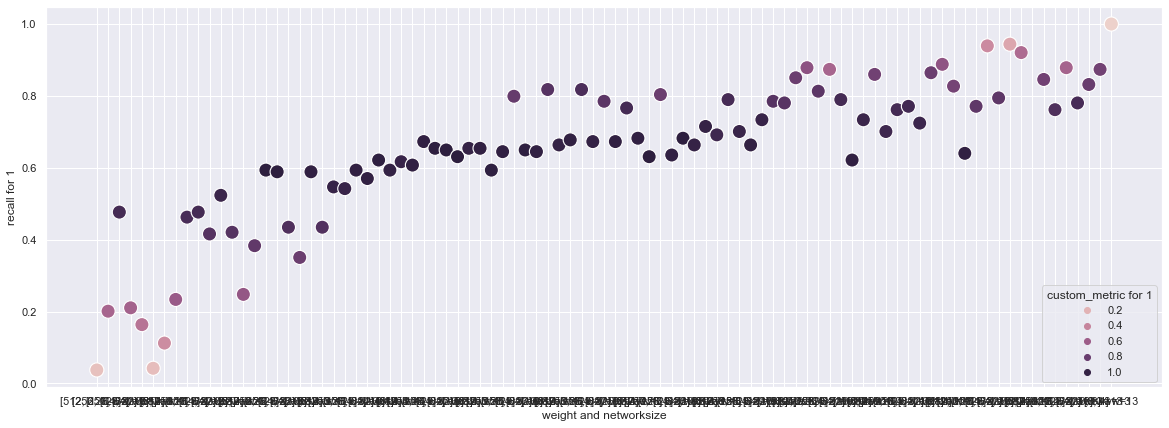

In [365]:
plt.figure(figsize=[20,7])
sns.scatterplot(x = weight_n , y = recall_1, hue = custom_metric_n, s= 200)
plt.xlabel("weight and networksize")
plt.ylabel("recall for 1")
plt.legend(title='custom_metric for 1', loc='lower right')
plt.show()
#hue of custom metric shows us two light colored tails at the bottom left and upper right , which means that we have included
#the range of the weights that don't disrupt the balance too much in our search (those darker ones in the middle).

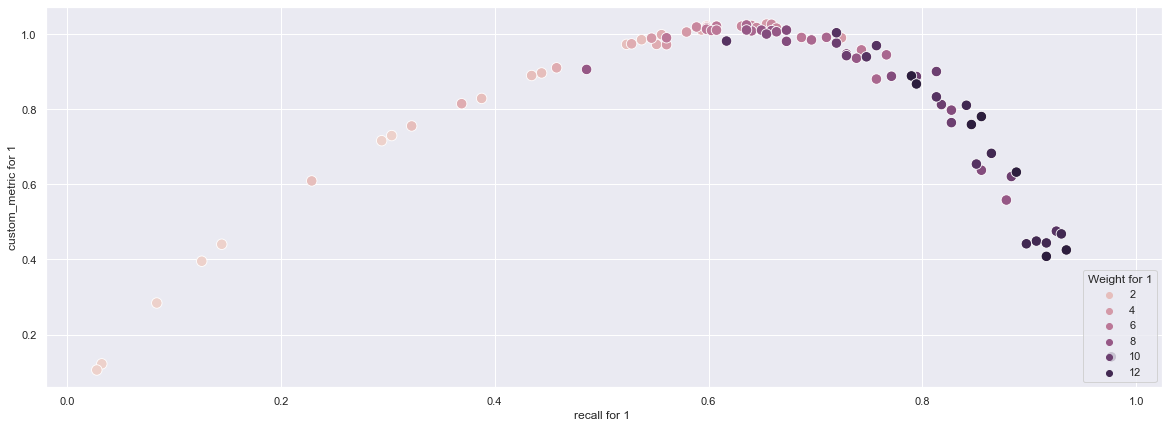

In [151]:
plt.figure(figsize=[20,7])
sns.scatterplot(x = recall_1 , y = custom_metric_n, hue = weight_values, s= 110)
plt.xlabel("recall for 1 ")
plt.ylabel("custom_metric for 1")
plt.legend(title='Weight for 1', loc='lower right')
plt.show()

#In this graph we see recall mapped against the  custom metric (balance of recall(0) and F1(1)) , with weight as hue this 
#allows us to see at which weight value does the increase in recall (influenced by the weight) becomes too detrimental for the 
#F1 score of class 0. It appears that the descent starts around the weights of 5-7


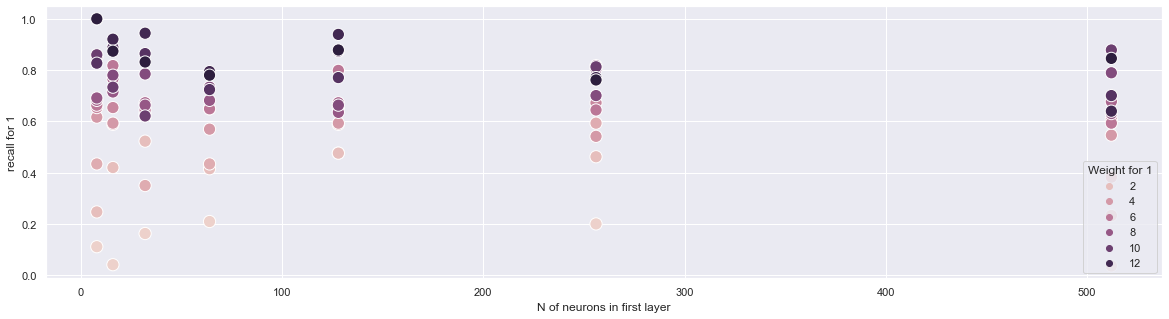

In [369]:
plt.figure(figsize=[20,5])



sns.scatterplot(x = network_sizes , y = recall_1, hue = weight_values, s=150)
plt.xlabel("N of neurons in first layer")
plt.ylabel("recall for 1")
plt.legend(title='Weight for 1', loc='lower right')
plt.show()

#Here it appears (to me at least) that the variance in recall slightly reduces with a larger number of neurons. 

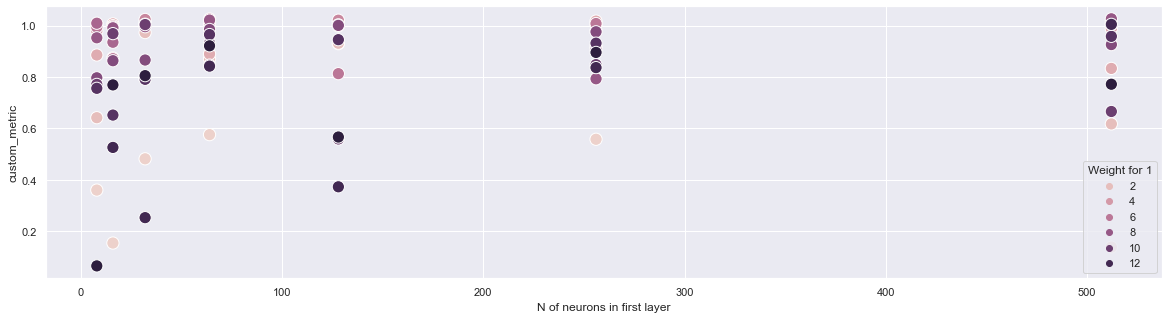

In [370]:
plt.figure(figsize=[20,5])
sns.scatterplot(x = network_sizes , y = custom_metric_n, hue = weight_values, s=150)
plt.xlabel("N of neurons in first layer")
plt.ylabel("custom_metric")
plt.legend(title='Weight for 1', loc='lower right')
plt.show()

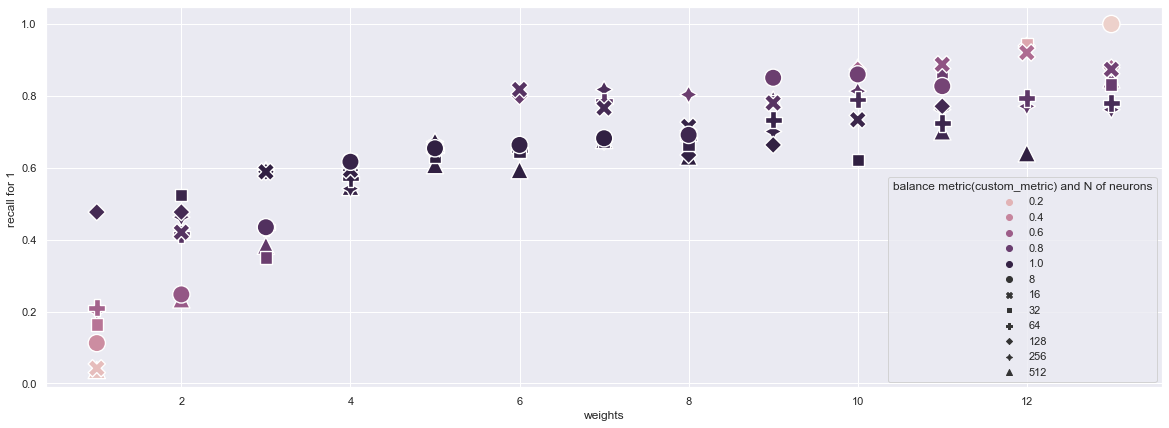

In [372]:
plt.figure(figsize=[20,7])
sns.scatterplot(x = weight_values , y = recall_1, hue = custom_metric_n, s= 300, style = network_sizes)
plt.ylabel("recall for 1 ")
plt.xlabel("weights")
plt.legend(title='balance metric(custom_metric) and N of neurons', loc='lower right')
plt.show()

#Here we can see that as we go past the weight of 7-8 we start singifincantly reducing the f1 score of 1.
#we can also see that bigger numbers of neurons tend to lead to overall better custom metric score across all weight levels.


In [405]:
#General purpose model (F1 weighted average + accuracy)

In [421]:
weights = {0:1, 1:5}

In [422]:
model = Sequential()
model.add(Dense(512, activation = "relu",input_shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [429]:
model.fit(saved_xtrain,saved_ytrain, epochs=150,validation_split=0.1 , class_weight = weights,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 6854 samples, validate on 762 samples
Epoch 1/150
6854/6854 [==============================] - 1s 100us/sample - loss: 0.8910 - accuracy: 0.7911 - val_loss: 1.0821 - val_accuracy: 0.7966
Epoch 2/150
6854/6854 [==============================] - 1s 95us/sample - loss: 0.8850 - accuracy: 0.7997 - val_loss: 1.0753 - val_accuracy: 0.8005
Epoch 3/150
6854/6854 [==============================] - 1s 94us/sample - loss: 0.8852 - accuracy: 0.7991 - val_loss: 1.0901 - val_accuracy: 0.8018
Epoch 4/150
6854/6854 [==============================] - 1s 97us/sample - loss: 0.8759 - accuracy: 0.8027 - val_loss: 1.0995 - val_accuracy: 0.7887
Epoch 5/150
6854/6854 [==============================] - 1s 95us/sample - loss: 0.8726 - accuracy: 0.8048 - val_loss: 1.0750 - val_accuracy: 0.7336
Epoch 6/150
6854/6854 [==============================] - 1s 97us/sample - loss: 0.8719 - accuracy: 0.8000 - val_loss: 1.0789 - val_accuracy: 0.8018
Epoch 7/150
68

In [430]:
y_test_pred = model.predict(saved_xtest)
for i in range(len(y_test_pred)):
    
    if y_test_pred[i] >= 0.5:
        y_test_pred[i] = 1
    if y_test_pred[i] <= 0.5:
        y_test_pred[i] = 0

In [431]:
print(classification_report(saved_ytest.astype("int32"),y_test_pred.astype("int32")))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1130
           1       0.48      0.52      0.50       214

    accuracy                           0.84      1344
   macro avg       0.70      0.71      0.70      1344
weighted avg       0.84      0.84      0.84      1344



In [432]:
confusion = sklearn.metrics.confusion_matrix(y_true=saved_ytest.astype("int32"), y_pred=y_test_pred.astype("int32"))
print("      NOT interested :  Job Change")
print("True       " + str(confusion[0][0]) + "           " + str(confusion[1][1]))
print("False      " + str(confusion[1][0]) + "            " + str(confusion[0][1]))

      NOT interested :  Job Change
True       1011           112
False      102            119


In [433]:
#Save the model to drive

In [434]:
import os

from tensorflow.keras.models import model_from_json


In [435]:
model_json = model.to_json()

In [438]:

with open("general_model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("general_model.h5")
print("Saved model to drive")

Saved model to drive


In [464]:
#Recall for 1 model

In [539]:
weights = {0:1, 1:8}

In [540]:
model = Sequential()
model.add(Dense(512, activation = "relu",input_shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [556]:
model.fit(saved_xtrain,saved_ytrain, epochs=150,validation_split=0.1 , class_weight = weights,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 6854 samples, validate on 762 samples
Epoch 1/150
6854/6854 [==============================] - 1s 96us/sample - loss: 1.0548 - accuracy: 0.7167 - val_loss: 1.7531 - val_accuracy: 0.7533
Epoch 2/150
6854/6854 [==============================] - 1s 94us/sample - loss: 1.0398 - accuracy: 0.7213 - val_loss: 1.7721 - val_accuracy: 0.7874
Epoch 3/150
6854/6854 [==============================] - 1s 95us/sample - loss: 1.0545 - accuracy: 0.7178 - val_loss: 1.6925 - val_accuracy: 0.7441
Epoch 4/150
6854/6854 [==============================] - 1s 95us/sample - loss: 1.0326 - accuracy: 0.7352 - val_loss: 1.6086 - val_accuracy: 0.6785
Epoch 5/150
6854/6854 [==============================] - 1s 97us/sample - loss: 1.0441 - accuracy: 0.7153 - val_loss: 1.8481 - val_accuracy: 0.7651
Epoch 6/150
6854/6854 [==============================] - 1s 98us/sample - loss: 1.0335 - accuracy: 0.7245 - val_loss: 1.6619 - val_accuracy: 0.6024
Epoch 7/150
685

In [557]:
y_test_pred = model.predict(saved_xtest)
for i in range(len(y_test_pred)):
    
    if y_test_pred[i] >= 0.5:
        y_test_pred[i] = 1
    if y_test_pred[i] <= 0.5:
        y_test_pred[i] = 0

In [558]:
print(classification_report(saved_ytest.astype("int32"),y_test_pred.astype("int32")))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1130
           1       0.23      0.78      0.35       214

    accuracy                           0.54      1344
   macro avg       0.57      0.64      0.50      1344
weighted avg       0.81      0.54      0.60      1344



In [491]:
#With this model we have succesfuly detected around 78% of people who want a job change, while also reducing the
#volume of our mailing list by half with high precision. However, compared to the general purpose model, we have greatly
#sacrificed recall for 0 and weighted F1 average.

In [559]:

with open("recall_model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("recall_model.h5")
print("Saved model to drive")

Saved model to drive


In [560]:
loaded_model = model_from_json(open("model" + ".json", "r").read())

In [561]:

def load_model(name):
    global loaded_model
    
    # load json and create model
    json_file = open( name + ".json", "r")
    loaded_model_json = json_file.read()
    json_file.close()

    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(name + ".h5")
    print("Loaded model from drive")

In [562]:
load_model("general_model")

Loaded model from drive


In [563]:
#Evaluate the model from drive

In [564]:
y_test_pred = loaded_model.predict(saved_xtest)

In [565]:
for i in range(len(y_test_pred)):
    
    if y_test_pred[i] >= 0.5:
        y_test_pred[i] = 1
    if y_test_pred[i] <= 0.5:
        y_test_pred[i] = 0

In [566]:
print(classification_report(saved_ytest.astype("int32"),y_test_pred.astype("int32")))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1130
           1       0.48      0.52      0.50       214

    accuracy                           0.84      1344
   macro avg       0.70      0.71      0.70      1344
weighted avg       0.84      0.84      0.84      1344



In [572]:
old_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [573]:
df_withid = df

In [574]:
df_withid["employee_id"] = old_data["enrollee_id"]

In [575]:
df_withid

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Male,...,Funded Startup,NGO,Public Sector,Pvt Ltd,Business Degree,Humanities,No Major,STEM,Other_degree,employee_id
1,0.776,0,0,2,16,1,2,47,0.0,1,...,0,0,0,1,0,0,0,1,0,29725.0
4,0.767,1,0,3,22,1,2,8,0.0,1,...,1,0,0,0,0,0,0,1,0,666.0
7,0.762,1,0,2,14,0,2,18,1.0,1,...,0,0,0,1,0,0,0,1,0,402.0
8,0.920,1,0,2,8,1,1,46,1.0,1,...,0,0,0,1,0,0,0,1,0,27107.0
11,0.920,1,0,2,6,4,1,108,0.0,1,...,0,0,0,1,0,0,0,1,0,23853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0.624,0,2,2,2,2,1,52,1.0,1,...,0,0,0,1,0,0,0,1,0,21319.0
19149,0.920,1,0,3,10,1,1,36,1.0,1,...,0,0,0,1,0,0,0,1,0,251.0
19150,0.920,1,0,2,11,2,2,23,0.0,0,...,0,0,1,0,0,0,0,1,0,32313.0
19152,0.920,1,0,2,8,1,1,25,0.0,0,...,1,0,0,0,0,1,0,0,0,29754.0


In [583]:
def predict_for_specific_person(employee_id):
    X_single = df.loc[df["employee_id"] == employee_id].drop("target",axis=1)
    X_single = X_single.drop("employee_id",axis=1)
    load_model("recall_model")
    single_prediction = loaded_model.predict(X_single)
    if single_prediction[0][0] >= 0.5:
        return 1
    else:
        return 0
    

In [584]:
predict_for_specific_person(402)

Loaded model from drive


1